In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# some algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### Read the Dataset

In [2]:
df=pd.read_csv("IMDb Movies India.csv",encoding="latin-1")


In [3]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
print(df.shape)

(15509, 10)


### EDA


In [5]:
print(df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [6]:
print(df.duplicated().sum())

6


In [7]:
print(df.describe())


            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


### Handling Missing values

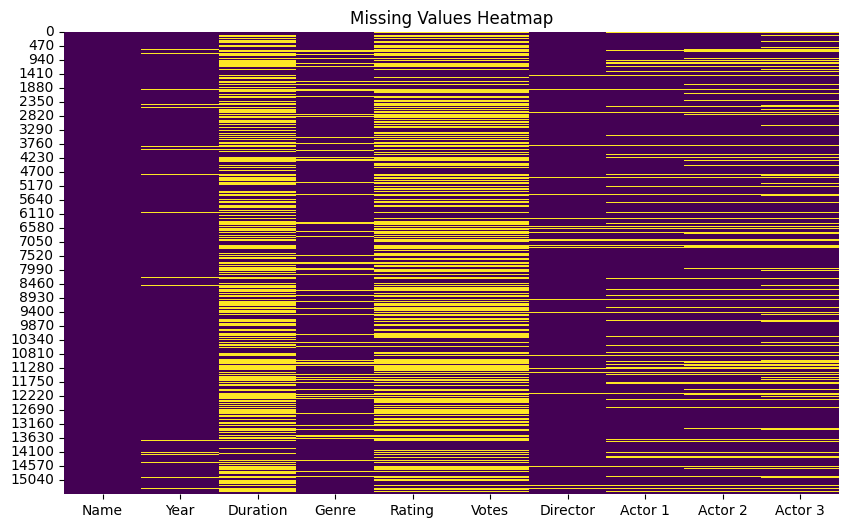

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
def extract_minutes(duration):
    if pd.isnull(duration):
        return duration
    try:
        return int(duration.split(' ')[0])
    except:
        return None

In [10]:
df['Duration'] = df['Duration'].apply(extract_minutes)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [11]:
df.drop(columns=['Year', 'Duration'], inplace=True)

In [12]:
numerical_cols = ['Rating', 'Votes']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Garima Varshney\AppData\Local\Temp\ipykernel_3124\1652560933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Garima Varshney\AppData\Local\Temp\ipykernel_3124\1652560933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [13]:
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Garima Varshney\AppData\Local\Temp\ipykernel_3124\2758321497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


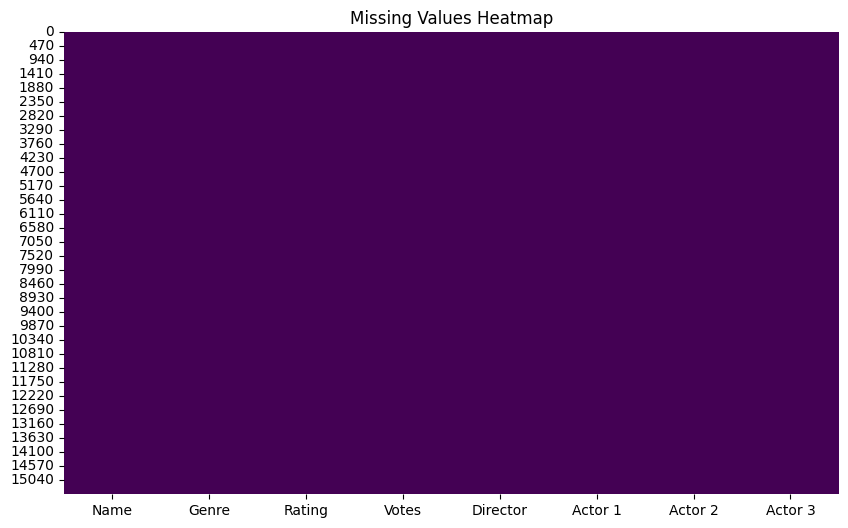

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [15]:
df.isnull().sum()

Name        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
df.shape

(15509, 8)

### handle Categorical variables

In [17]:
X = pd.get_dummies(df.drop(columns=['Rating']))

In [18]:

df_encoded = pd.get_dummies(df.drop(columns=['Rating']))
le = LabelEncoder()
df_encoded['Rating'] = le.fit_transform(df['Rating'])

In [19]:

X = df.drop(columns=['Rating'])
y = df['Rating']

## Spliting the dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Linear SVC': LinearSVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [22]:
all_ratings = pd.concat([y_train, y_test]).unique()
le = LabelEncoder()
le.fit(all_ratings)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [23]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [24]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ])

In [27]:

for rating, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_test) # Use predict to generate predictions on the test set
    score = accuracy_score(y_test_encoded, y_pred)
    print(f"Model: {rating}, Score: {score:.4f}")

C:\Users\Garima Varshney\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression, Score: 0.5093
Model: SVC, Score: 0.5135


C:\Users\Garima Varshney\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Linear SVC, Score: 0.4839
Model: Random Forest, Score: 0.5148
Model: K-Nearest Neighbors, Score: 0.4958
Model: Decision Tree, Score: 0.5045


here we see the accuracy is very low so we have to increase the accuracy